In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix


In [2]:
%matplotlib inline

In [3]:
recent_grads=pd.read_csv("recent-grads.csv")

In [4]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [5]:
raw_data_count=recent_grads.shape[0]
print("raw_data_count={}".format(raw_data_count))
recent_grads=recent_grads.dropna()
cleaned_data_count=recent_grads.shape[0]
print("Cleaned_data_count={}".format(cleaned_data_count))

raw_data_count=173
Cleaned_data_count=172


In [6]:
recent_grads

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972
5,6,2418,NUCLEAR ENGINEERING,2573.0,2200.0,373.0,Engineering,0.144967,17,1857,...,264,1449,400,0.177226,65000,50000,102000,1142,657,244
6,7,6202,ACTUARIAL SCIENCE,3777.0,2110.0,1667.0,Business,0.441356,51,2912,...,296,2482,308,0.095652,62000,53000,72000,1768,314,259
7,8,5001,ASTRONOMY AND ASTROPHYSICS,1792.0,832.0,960.0,Physical Sciences,0.535714,10,1526,...,553,827,33,0.021167,62000,31500,109000,972,500,220
8,9,2414,MECHANICAL ENGINEERING,91227.0,80320.0,10907.0,Engineering,0.119559,1029,76442,...,13101,54639,4650,0.057342,60000,48000,70000,52844,16384,3253
9,10,2408,ELECTRICAL ENGINEERING,81527.0,65511.0,16016.0,Engineering,0.196450,631,61928,...,12695,41413,3895,0.059174,60000,45000,72000,45829,10874,3170


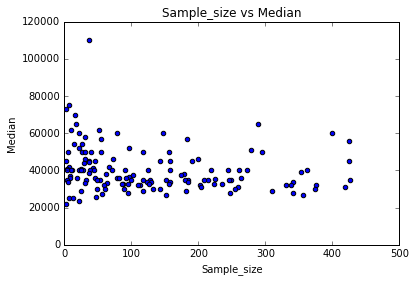

In [7]:
recent_grads.plot(x="Sample_size",y="Median",kind="Scatter",title="Sample_size vs Median",xlim=(0,500))

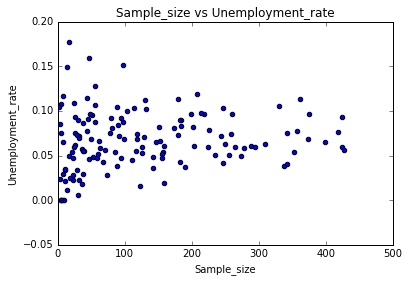

In [8]:
recent_grads.plot(x="Sample_size",y="Unemployment_rate",kind="scatter",title="Sample_size vs Unemployment_rate",xlim=(0,500))

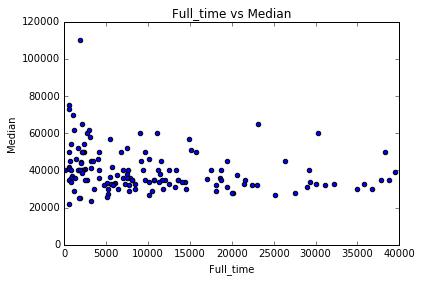

In [9]:
recent_grads.plot(x="Full_time",y="Median",kind="Scatter",title="Full_time vs Median",xlim=(0,40000))

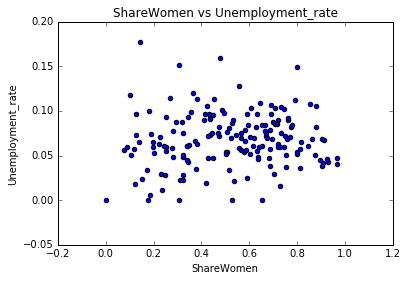

In [10]:
recent_grads.plot(x="ShareWomen",y="Unemployment_rate",kind="Scatter",title="ShareWomen vs Unemployment_rate")

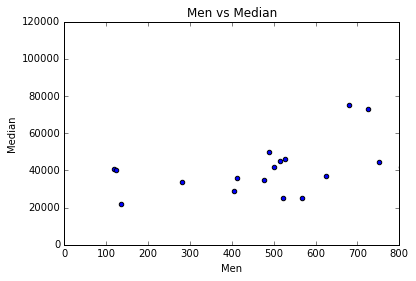

In [11]:
recent_grads.plot(x="Men",y="Median",kind="scatter",title="Men vs Median",xlim=(0,800))

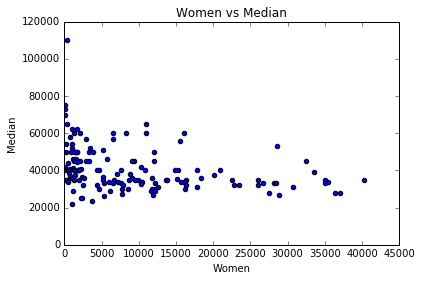

In [12]:
recent_grads.plot(x="Women",y="Median",kind="scatter",title="Women vs Median",xlim=(0,45000))

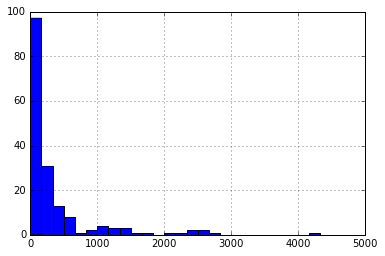

In [13]:
recent_grads["Sample_size"].hist(bins=30,range=(0,5000))

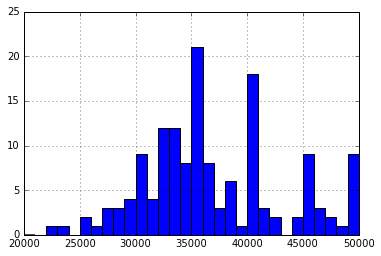

In [14]:
recent_grads["Median"].hist(bins=30,range=(20000,50000))

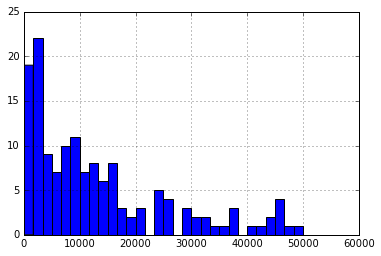

In [15]:
recent_grads["Employed"].hist(bins=30,range=(0,50000))

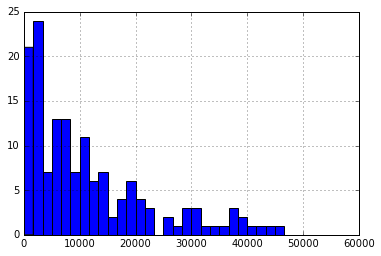

In [16]:
recent_grads["Full_time"].hist(bins=30,range=(0,50000))

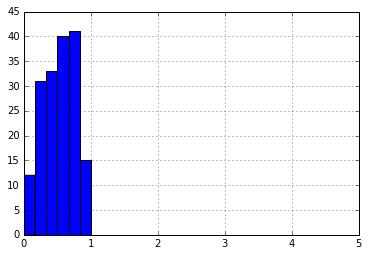

In [17]:
recent_grads["ShareWomen"].hist(bins=30,range=(0,5))

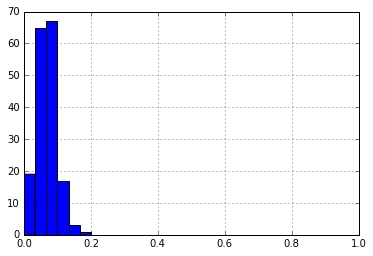

In [18]:
recent_grads["Unemployment_rate"].hist(bins=30,range=(0,1))

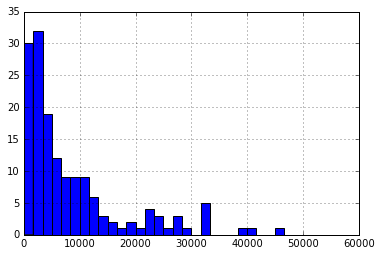

In [19]:
recent_grads["Men"].hist(bins=30,range=(0,50000))

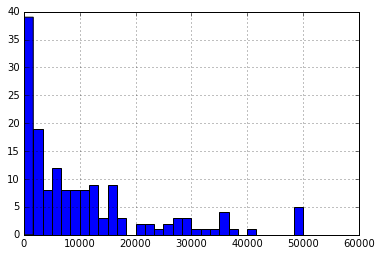

In [20]:
recent_grads["Women"].hist(bins=30,range=(0,50000))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7fb8649780>,
      dtype=object)

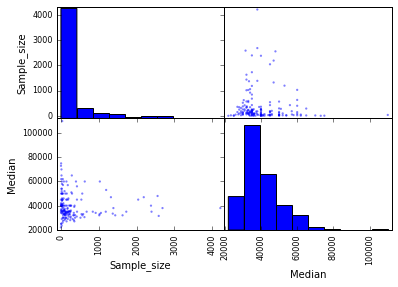

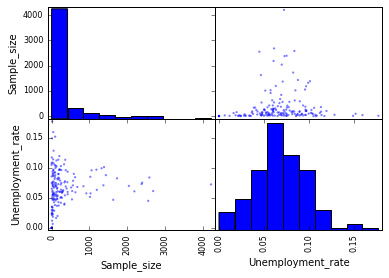

In [21]:
scatter_matrix(recent_grads[['Sample_size','Median']])
scatter_matrix(recent_grads[["Sample_size","Unemployment_rate"]])

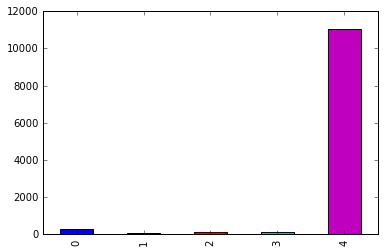

In [22]:
recent_grads[:5]['Women'].plot(kind='bar')

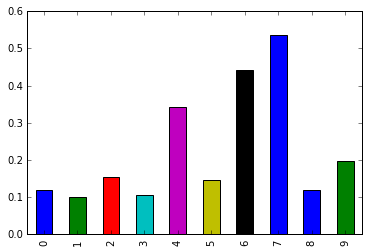

In [23]:
recent_grads[:10]["ShareWomen"].plot(kind="bar")

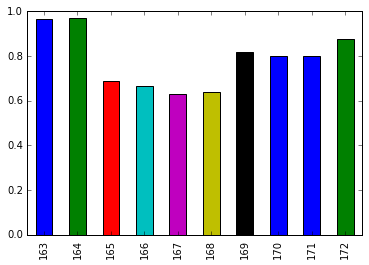

In [24]:
recent_grads[162:]["ShareWomen"].plot(kind="bar")

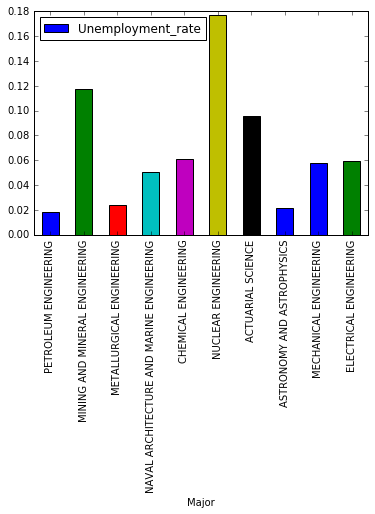

In [25]:
recent_grads[:10].plot.bar(x="Major",y="Unemployment_rate")

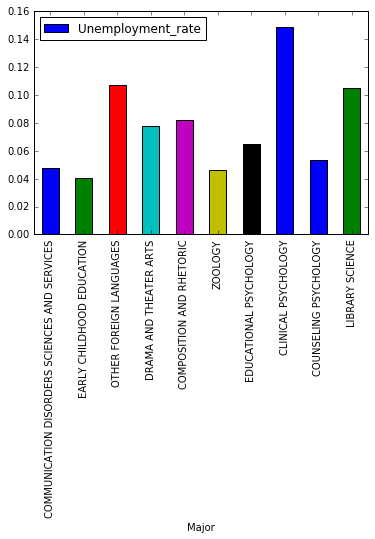

In [37]:
recent_grads[162:].plot.bar(x="Major",y="Unemployment_rate")

/dataquest/system/env/python3/lib/python3.4/site-packages/pandas/plotting/_core.py:1716: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



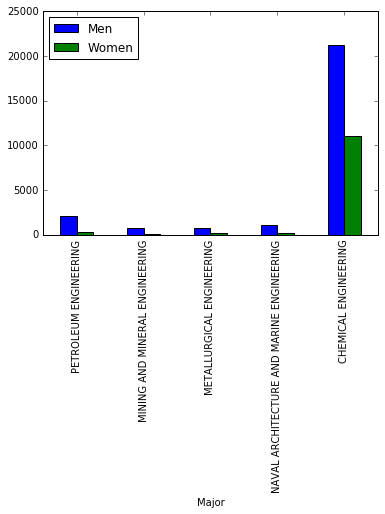

In [41]:
recent_grads[:5].plot.bar(x="Major",y=["Men","Women"])